In [1]:
%load_ext autoreload
%autoreload 2

import os, pickle, random, sbmtm
# import seaborn as sns; sns.set(style="white", color_codes=True) # is not installed on system, just folder in this directory
import numpy as np
import pandas as pd
from sbmtm import sbmtm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path_read = 'cleaned_posts/'
fname_read = '10149142-the-family-fang.json'
filename = os.path.join(path_read,fname_read)
print(filename)

cleaned_posts/10149142-the-family-fang.json


In [3]:
with open(filename,"r",encoding="utf8") as f:
    df = pd.DataFrame(pd.read_json(f)).T

In [4]:
df.head()

,delta,likes,name,raw_text,text,word_count
1,-338,0,ehicifj.json,i had so much fun reading this book i actuall...,"[fun, read, book, actually, finish, book, disn...",54
2,152,0,acfajgi.json,i avoided this book for the longest time beca...,"[avoid, book, long, time, book, description, p...",41
3,444,0,fdccaeb.json,a rare contemporary novel that understands tha...,"[rare, contemporary, novel, understand, call, ...",41
4,-195,1 like,ecaaeab.json,what an a a mazing debut compelling and one o...,"[debut, compelling, kind, story, pair, perform...",60
5,-303,0,hebfff.json,this absolutely lives up to the hype great cha...,"[absolutely, live, hype, great, character, fla...",35


In [5]:
m_min = 100 ## minimum text length
df = df[df['word_count']>=m_min]

In [6]:
df.head()

,delta,likes,name,raw_text,text,word_count
29,263,0,ieaedc.json,so kevin wilson writes really well simple but ...,"[kevin, wilson, write, simple, lovely, prose, ...",106
40,-394,2 likes,ceecba.json,a friend brought me this book and two others w...,"[friend, bring, book, home, work, sick, dog, r...",145
41,356,0,aabbgjh.json,you could look at this book as an examination...,"[look, book, examination, book, mean, artist, ...",149
50,-249,1 like,fffcgf.json,what constitutes art for caleb and camille fan...,"[constitute, art, caleb, camille, fang, involv...",149
53,123,0,eefgbfd.json,have you ever realised how much a person’s pe...,"[realise, person, ’s, personality, affect, per...",190


In [7]:
list_texts = list(df['text'])
list_titles = list(df.index)
# list_titles

In [8]:
len(list_texts)

234

In [9]:
list_dt = list(df['delta'])

Text(0,0.5,'# books lenth >= m')

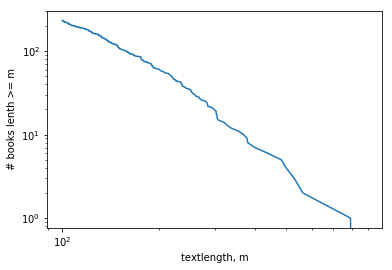

In [10]:
list_m = [len(text) for text in list_texts]
N = len(list_texts)
x = np.sort(list_m)
y = (np.arange(N)+1)

plt.plot(x,N-y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('textlength, m')
plt.ylabel('# books lenth >= m')

In [11]:
model = sbmtm()

In [12]:
model.make_graph(list_texts,documents = list_titles)

In [13]:
model.fit()

In [14]:
model.topics(l=1)

{0: [('performance', 0.054835493519441676),
  ('caleb', 0.05051512130275839),
  ('camille', 0.04918577600531738),
  ('artist', 0.04885343968095713),
  ('wilson', 0.03589232303090728),
  ('novel', 0.03290129611166501),
  ('people', 0.02991026919242273),
  ('kevin', 0.02193419740777667),
  ('great', 0.020937188434695914),
  ('event', 0.01694915254237288)],
 1: [('not', 0.015850004832318545),
  ('like', 0.013917077413743114),
  ('love', 0.01130762539866628),
  ('time', 0.010437808060307335),
  ('way', 0.010341161689378564),
  ('end', 0.00947134435101962),
  ('good', 0.008988112496375761),
  ('feel', 0.00889146612544699),
  ('know', 0.008504880641731903),
  ('go', 0.007925002416159272)],
 2: [('art', 0.02303735182285842),
  ('fang', 0.02247819279803176),
  ('parent', 0.022142697383135762),
  ('book', 0.021919033773205098),
  ('child', 0.02147170655334377),
  ('buster', 0.02080071572355178),
  ('family', 0.020688883918586445),
  ('annie', 0.02035338850369045),
  ('read', 0.01655110713486915

Text(0,0.5,'fraction of posts in doc-group')

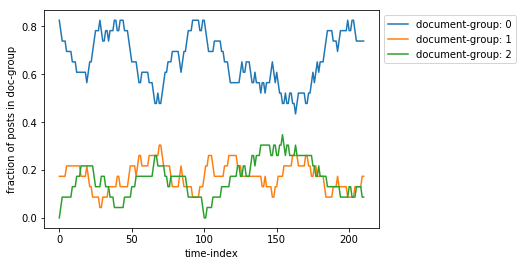

In [15]:
## group membership of doc-, and word-nodes
p_td_d,p_tw_w = model.group_membership(l=1)

D = model.get_D() ## number of documents
B_d = len(p_td_d[:,0]) ## number of doc-groups
B_w = len(p_tw_w[:,0]) ## number of word-groups

## sort docs according to time-stamp
indsort = np.argsort(list_dt)
p_td_d_sort = p_td_d[:,indsort]

## measure fraction of docs in each doc-group in a running window of length s
s = int(D/10) ## running window with s posts
arr_t_s = np.zeros((B_d,D-s))
for i in range(D-s):
    arr_t_s[:,i] = np.mean(p_td_d_sort[:,i:i+s],axis=1)

## plot
for t_w in range(B_d):
    plt.plot(arr_t_s[t_w,:],label='document-group: %s'%(t_w))
plt.legend(bbox_to_anchor=(1,1))

plt.xlabel('time-index')
plt.ylabel('fraction of posts in doc-group')

Text(0.5,0,'word-group')

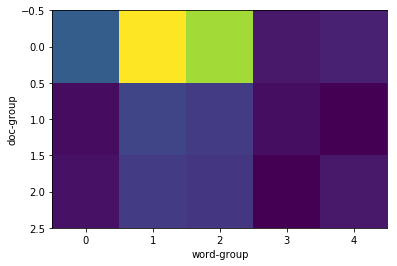

In [16]:
## fraction of tokens from doc-group td to word-group tw
p_td_tw = model.group_to_group_mixture(l=1,norm = True)
np.shape(p_td_tw)
plt.imshow(p_td_tw,aspect='auto')
plt.ylabel('doc-group')
plt.xlabel('word-group')

In [28]:
n_td_tw = model.group_to_group_mixture(l=1,norm = False)

In [30]:
n_td = np.sum(n_td_tw,axis=1)
n_tw = np.sum(n_td_tw,axis=0)
print(n_td,n_tw)

[17285.  3736.  3757.] [ 3009. 10347.  8942.  1029.  1451.]


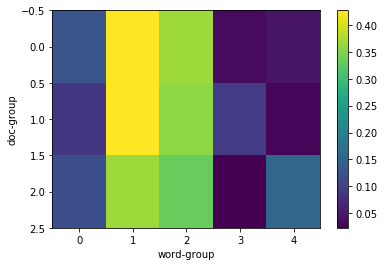

In [17]:
## conditional probability p(tw | td)
p_tw_cond_td = p_td_tw.T/np.sum(p_td_tw,axis=1)[np.newaxis,:]#[:,np.newaxis]
plt.imshow(p_tw_cond_td.T,aspect='auto')
# plt.imshow(np.log(p_tw_cond_td.T),aspect='auto')

plt.ylabel('doc-group')
plt.xlabel('word-group')
plt.colorbar()

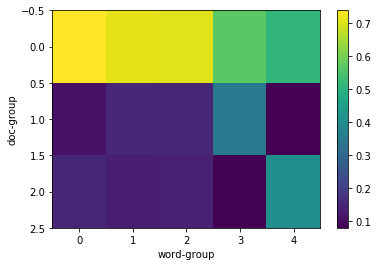

In [18]:
## conditional probability p(td | tw)
p_td_cond_tw = p_td_tw/np.sum(p_td_tw,axis=0)[np.newaxis,:]#[:,np.newaxis]
plt.imshow(p_td_cond_tw,aspect='auto')
# plt.imshow(np.log(p_tw_cond_td.T),aspect='auto')

plt.ylabel('doc-group')
plt.xlabel('word-group')
plt.colorbar()

## How informative is each topic?

We calculate $p(t_d,t_w)$ as the fraction of word tokens that are in doc-group $t_d$ and word-group $t_w$.

Then, we want to know for each word-topic $t_w$ how uneven it 'loads' into the doc-groups. Therefore we calculate 

$p(t_d | t_w) = \frac{p(t_d , t_w)}{p(t_w)}$;

which says: given we found a word token belonging to word-group $t_w$, how likely is it that it belongs to doc-group $t_d$?

For for each $t_w$, we can then calculate how uneven this distribution is (smaller H = more uneven):

$H(t_w) = -\sum_{t_d} p(t_d | t_w) \log p(t_d | t_w)$.


Now it is crucial to compare this number with what we would expect from chance ($t_d$ and $t_w$ are independent from each other, denoted with $\tilde{x}$):

$\tilde{p}(t_d | t_w) = \frac{\tilde{p}(t_d , t_w)}{\tilde{p}(t_w)} = \frac{\tilde{p}(t_d)\tilde{p}(t_w)}{\tilde{p}(t_w)} = \tilde{p}(t_d) = p(t_d)$.

Thus

$\tilde{H}(t_w) = -\sum_{t_d} p(t_d ) \log p(t_d )$ which is the same for all $t_w$.

Now we look at 

$\delta H (t_w) = \tilde{H} - H(t_w)$

and the larger the value of $\delta H$, the more informative the topic $t_w$ (since the random entropy is always larger than the non-random entropy)


Text(0,0.5,'$\\delta H (t_w)$')

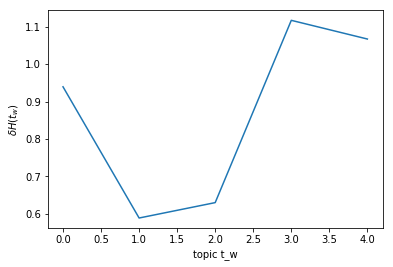

In [32]:

H_ = -np.nansum(p_td_tw*np.log(p_td_tw),axis=0)
p_td = np.sum(p_td_tw,axis=0)
H_rand_ = -np.nansum(p_td*np.log(p_td))
# plt.plot(H_)
plt.plot(H_rand_-H_) ## high is better
plt.xlabel('topic t_w')
plt.ylabel(r'$\delta H (t_w)$')

In this example, it seems that topic 3 and 4 are the most informative; while topic 1 and 2 are the least informative. Topic 0 is in between.

Looking at the individual topics this seems to make sense (above).

The tricky thing will be to select a cutoff. But one could take the n most informative topics.

In [23]:
## How much does each document group load on patricular topics?
result = model.get_groups(l=1)

In [24]:
p_tw_d = result['p_tw_d']

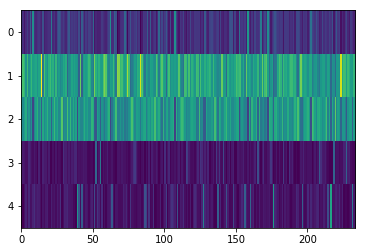

In [25]:
plt.imshow(p_tw_d,aspect='auto')

In [26]:
## how much each word-topic loads into each document
D = model.get_D()
B_w = len(p_tw_w[:,0])
p_tw_d = np.zeros(( B_w,D ))
for i in range(D):
    p_tw_d[:,i] = [ h[1] for h in model.topicdist(i,l=1) ]
    
indsort = np.argsort(list_dt)
p_tw_d = p_tw_d[:,indsort]

# indsort = np.argsort(list_dt)
# plt.imshow(p_td_w,aspect='auto',vmin=0,vmax=1)
# plt.imshow(p_td_w,aspect='auto',vmin=0,vmax=1)

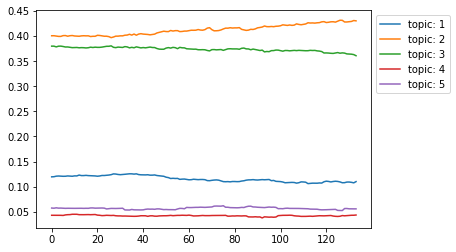

In [27]:
s = 100 ## running window with s posts
arr_t_s = np.zeros((B_w,D-s))
for i in range(D-s):
    arr_t_s[:,i] = np.mean(p_tw_d[:,i:i+s],axis=1)

for t_w in range(B_w):
    plt.plot(arr_t_s[t_w,:],label='topic: %s'%(t_w+1))
plt.legend(bbox_to_anchor=(1,1))